In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
len(X_train)

60000

In [5]:
len(X_test)

10000

In [6]:
X_train[0].shape

(28, 28)

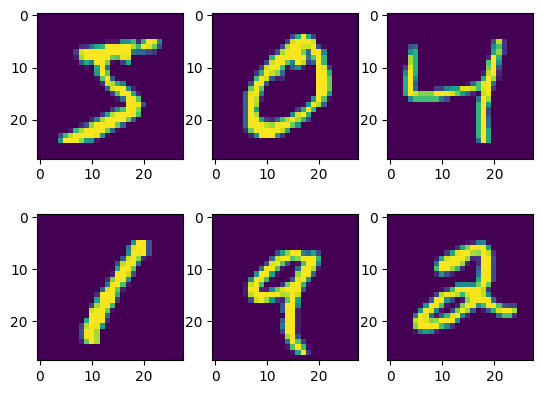

In [26]:
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(X_train[i])

In [8]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [9]:
X_train = X_train / 255
X_test = X_test / 255

In [10]:
X_train_flattened = X_train.reshape(len(X_train), 784)
X_test_flattened = X_test.reshape(len(X_test), 784)

In [11]:
X_train_flattened.shape

(60000, 784)

In [12]:
X_test_flattened.shape

(10000, 784)

In [13]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape = (784,), activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)

c:\python 3.9\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 788us/step - accuracy: 0.8145 - loss: 0.7130
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 727us/step - accuracy: 0.9125 - loss: 0.3116
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 782us/step - accuracy: 0.9227 - loss: 0.2785
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 767us/step - accuracy: 0.9239 - loss: 0.2705
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 777us/step - accuracy: 0.9263 - loss: 0.2616


In [14]:
model.evaluate(X_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 676us/step - accuracy: 0.9138 - loss: 0.3092


[0.27214738726615906, 0.9258000254631042]

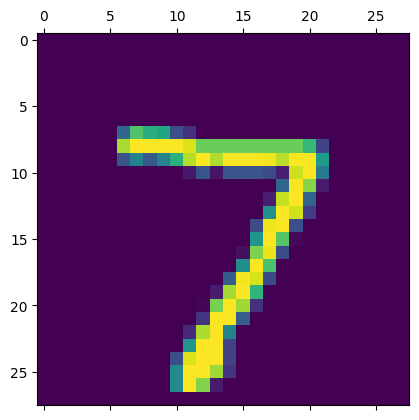

In [15]:
plt.matshow(X_test[0])

In [16]:
y_preds = model.predict(X_test_flattened)
y_preds[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 725us/step


array([1.7839128e-02, 4.1190344e-07, 4.1597076e-02, 9.6278566e-01,
       2.3245320e-03, 8.2119726e-02, 1.4503718e-06, 9.9978250e-01,
       1.2624998e-01, 6.2757689e-01], dtype=float32)

In [17]:
np.argmax(y_preds[0])

7

In [18]:
y_preds_label = [np.argmax(i) for i in y_preds]
y_preds_label[:5]

[7, 2, 1, 0, 4]

In [19]:
tf.math.confusion_matrix(labels=y_test, predictions=y_preds_label)

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 958,    0,    0,    2,    0,    4,   11,    3,    2,    0],
       [   0, 1109,    3,    2,    0,    1,    4,    2,   14,    0],
       [   5,   11,  915,   17,    7,    2,   13,    9,   49,    4],
       [   1,    0,   17,  934,    0,   15,    2,   10,   24,    7],
       [   1,    1,    3,    1,  911,    0,   13,    4,   10,   38],
       [   9,    2,    3,   48,   11,  746,   21,    9,   36,    7],
       [   7,    3,    5,    1,    7,    7,  924,    2,    2,    0],
       [   1,    6,   21,    7,    8,    1,    0,  952,    3,   29],
       [   4,    5,    6,   18,    9,   16,   11,   10,  890,    5],
       [   8,    7,    2,   12,   26,    5,    0,   21,    9,  919]])>

In [20]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape = (784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])  

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8727 - loss: 0.4572
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9612 - loss: 0.1290
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9743 - loss: 0.0868
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9805 - loss: 0.0640
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9853 - loss: 0.0472


In [21]:
model.evaluate(X_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 830us/step - accuracy: 0.9693 - loss: 0.0972


[0.08244620263576508, 0.9740999937057495]

In [22]:
y_preds = model.predict(X_test_flattened)
y_preds_label = [np.argmax(i) for i in y_preds]
tf.math.confusion_matrix(labels=y_test, predictions=y_preds_label)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 837us/step


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 965,    0,    2,    1,    1,    1,    5,    2,    2,    1],
       [   0, 1122,    5,    1,    0,    1,    3,    0,    3,    0],
       [   3,    2, 1013,    2,    1,    0,    2,    3,    6,    0],
       [   1,    0,    7,  987,    0,    2,    1,    4,    4,    4],
       [   3,    0,    6,    2,  943,    1,    8,    4,    2,   13],
       [   2,    0,    0,    9,    1,  869,    7,    1,    2,    1],
       [   4,    2,    1,    1,    1,    3,  946,    0,    0,    0],
       [   2,    5,   13,    1,    0,    0,    0, 1002,    1,    4],
       [   6,    0,    8,    6,    4,    9,    6,    8,  921,    6],
       [   5,    4,    2,    5,    7,    3,    1,    6,    3,  973]])>